# Les modèles d'Arbre de Décision
---

Les arbres de décision sont des algorithmes de machine learning pouvant être utilisés pour : 
- **Un problème de régression** où variable à prédire est quantitative (pour prédire par exemple le prix d'une maison)
- **Un problème de classification** où la variable à prédire est qualitative (prédire le spam par e-mail),

## 1 – Arbre de Decision : Classifieur

Le modèle d'arbre classifieur est un arbre binaire où les prédictions sont faites en parcourant l'arbre de **la racine** à **la feuille**.

Lors du parcours de chaque noeud :

- si une **caractéristique est inférieure à un seuil**, nous allons à gauche, à droite sinon.
- chaque **feuille est associée à une classe**, qui est la prédiction du modèle.

> On utilisera le jeu de données *iris* pour implémenter le classifieur

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

X = iris.data
y = iris.target

In [37]:
X = pd.DataFrame(X, columns=iris.feature_names)
y = pd.Series(y, name="y")

### 1.1 Métrique de split 

#### A. L'indice de GINI

Les arbres de décision utilisent le concept **d'impureté de Gini** pour décrire à quel point un noeud est *homogène* ou *pur*. 

Un noeud est dit pur $(G = 0)$ si toutes ses observations appartiennent à la même classe, tandis qu'un noeud avec de nombreuses observations de classes différentes aura un Gini proche de 1.

On défini **l'impureté Gini** de $n$ échantillons répartis en $k$ classes par :

$$\text{G} = 1 - \sum_{k=1}^{n}{\left(\frac{s_{k}}{s} \right)^2}$$

où : 
- $s$ correspond à l'échantillon total
- $s_k$ correspond à l'échantillon appartenant à la classe $k$

>On peut par exemple calculer l'indice de Gini sur des données du Dataset iris

In [40]:
def _gini(y):
    m = y.size
    return 1.0 - sum((np.sum(y == c) / m) ** 2 
                     for c in np.unique(y))

In [5]:
_gini(y)

0.6666666666666667

#### B. l'Entropie de Shanon

**l'Entropie** est une métrique qui mesure le désordre dans un systeme.

...


...

### 1.2. L'algorithme CART

L'algorithme utilisé dans un arbre de décision de type classifieur est appelée CART (abréviation de *Classification And Régression Trees*). Chaque noeud est construit de manière à minimiser l'impureré de Gini de chaque enfant.

La récursivité s'arrête lorsque la profondeur maximale est atteinte, c'est à dire quand plus aucune séparation n'est possible de manière plus pur que le noeud parent. 

*NB : Il est possible de contrôler le critère d'arrêt qui est crucial en pratique car il permet d'éviter le surapprentissage.*

### 1.3. Trouver la variable et le seuil optimal

L'objectif de l'algorithme CART est de trouver la variable et le seuil optimal pour que l'impureté de Gini soit minimisée. Il s'agit donc de la *racine* dans le cas du premier noeud de l'arbre.

Pour ce faire : **il faut calculer cet indice pour toutes les divisions possibles**. 

- Pour le cas d'une variable expliquée **binaire** le nombre il faut juster calculer l'indice dans le cas de chaque modalité.

- Pour une valeur **continue**, il faut au préalable trier les valeurs et utiliser comme seuil tous les points médians entre deux valeurs adjacentes.

> **Pour trouver tous les ponts médian** : On considère une variable du jeu de données et on récupère toutes les valeurs possibles

In [6]:
t = X["petal length (cm)"].unique()
t[:5]

array([1.4, 1.3, 1.5, 1.7, 1.6])

In [7]:
def __make_threshold(liste):
    liste_sorted = sorted(liste)
    return np.array([np.mean((liste_sorted[i], liste_sorted[i+1])) 
            for i in range(len(liste_sorted))[:-1]])

> On applique la moyenne pour chaque observation deux à deux (sans oublier de retirer la dernière valeur)

In [8]:
__make_threshold(t)[:5]

array([1.05, 1.15, 1.25, 1.35, 1.45])

In [73]:
class DecisionTreeClassif():
    def __init__(self, max_depth=None, target_name=None):
        self.max_depth = max_depth
        self.target_name = target_name
    
    def _gini(self, y):
        m = y.size
        return 1.0 - sum((np.sum(y == c) / m) ** 2 
                         for c in np.unique(y))
    
    def __make_threshold(self, liste):
        liste_sorted = sorted(liste)
        return np.array([np.mean((liste_sorted[i], liste_sorted[i+1])) 
                for i in range(len(liste_sorted))[:-1]])

    def fit(self,X,y):
        self.all_classes = 
        self.tree = self._best_gini(X,y, target_name=self.target_name)
        return self.tree
        
    def _best_gini(self, X,y, target_name):
        """
        Permet de trouver le meilleur split à partir de l'indice de Gini pondéré
        """

        # Calcule la pureté du noeud (l'indice de GINI parent) et 
        # retourne la classe majoritaire
        gini_node = self._gini(y)
        classe_maj = y.mode()[0]

        if target_name is not None:
            classe_maj = target_name[classe_maj]

        all_split = []

        # Cherche pour chaque variable le meilleur split 

        for var in X.columns:

            # Calcule les valeurs intermédiaires de toutes les valeurs possibles de la variable
            # Pour éviter la division par 0 si un split ne contient aucune valeur.

            res = []
            all_treshold = self. __make_threshold(np.unique(X[var]))

            for threshold in all_treshold:

                # Récupère les données pour le split selon le threshold
                classe = X[var] < threshold

                # Effectifs pour chaque classe et le total
                m = len(y)
                number_left = sum(classe)
                number_right = sum(~classe)

                # Indice de gini pour la branche de gauche et de droite
                gini_left = 1.0 - sum((sum(classe[y == i]) / number_left) ** 2 
                                      for i in self.all_classes)
                gini_right = 1.0 - sum((sum(~classe[y == i]) / number_right) ** 2 
                                       for i in self.all_classes)

                # Répartition de l'échantillon pour le split
                sample_left = {target_name[i] : np.sum(classe[y == i]) for i in self.all_classes}
                sample_right = {target_name[i] : np.sum(~classe[y == i]) for i in self.all_classes}

                # Gini pondéré entre les deux splits
                gini_pondere = (number_left * gini_left + number_right * gini_right) / m

                # Ajoute l'ensemble des résultats dans une liste
                res.append((gini_pondere, threshold, sample_left, sample_right))

            # Créer un DataFrame de l'ensemble des résultats pour chaque split
            best_gini = pd.DataFrame(res, columns=["gini","value",'sample_left', 'sample_right'])

            # Selectionne la ligne de l'indice de gini pondéré le plus faible et son seuil
            argmin = best_gini.gini.idxmin()
            threshold = best_gini.loc[argmin].value

            # Ajoute le meilleur split (indice de gini pondéré) pour chaque variable
            all_split.append((best_gini.gini.min(), threshold, var, 
                              best_gini.sample_left[argmin], best_gini.sample_right[argmin],
                            gini_node, classe_maj))

        # Transforme sous forme de DataFrame et trie par ordre ascendant
        select_split = pd.DataFrame(all_split, columns=["Gini pondéré", "threshold (<=) ", 
                                    'feature', 'sample_left', 
                                    "sample_right", 'gini_node',"classe"]
                                   ).sort_values(by=["Gini pondéré"], ascending=True).reset_index(drop=True)
        return select_split.loc[0]

SyntaxError: invalid syntax (<ipython-input-73-6bc5dd4dbacb>, line 17)

In [72]:
def tree_growth():
    pass

In [70]:
DecisionTreeClassif(target_name=iris.target_names).fit(X[50:],y[50:])

Gini pondéré                                              0.110306
threshold (<=)                                                1.75
feature                                           petal width (cm)
sample_left        {'setosa': 0, 'versicolor': 49, 'virginica': 5}
sample_right       {'setosa': 0, 'versicolor': 1, 'virginica': 45}
gini_node                                                      0.5
classe                                                  versicolor
Name: 0, dtype: object

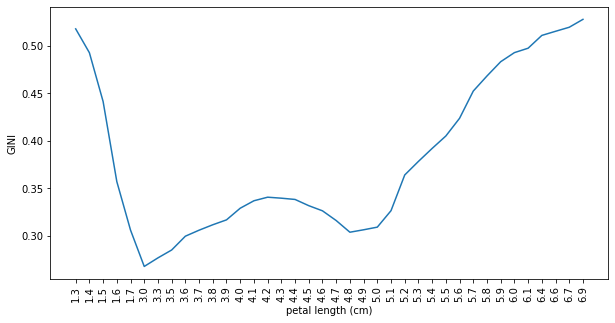

In [616]:
plt.figure(figsize=(10,5))
plt.plot([i[0] for i in res], )
plt.xticks(ticks=range(len(res)),labels=[i[1] for i in res], rotation='vertical')
plt.xlabel(iris.feature_names[2])
plt.ylabel('GINI');
plt.annotate()

# Avec sklearn

In [863]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

In [864]:
clf = DecisionTreeClassifier(max_depth=2)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

clf.fit(X,y)
clf.score(X,y)

0.96

En haut de l'arbre on trouve la racine : 

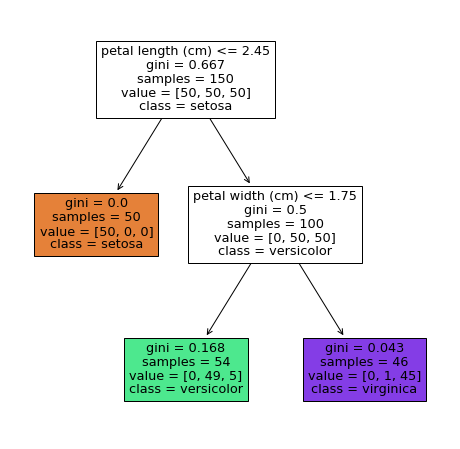

In [865]:
plt.figure(figsize=(8,8))
plot_tree(clf, feature_names=iris.feature_names, 
          class_names=iris.target_names,
         filled=True);

- On peut lire le nom de la variable discrimante et sa valeur (pour notre cas, il s'agit de la longueur de la pétale qui est supérieur à 2,35 cm). 

- On peut lire le coefficient de GINI

- Sample fait référence à la taille de l'échantillon
- Value fait référence à la taille de l'échantilllon pour chacune des classes.

- Class : fait référence à la classe majoritaire lors de cette embranchement.

## Référence 

[TowardsDataScience, Decision Tree from scratch in python](https://towardsdatascience.com/decision-tree-from-scratch-in-python-46e99dfea775)